In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [8]:
url = 'https://raw.githubusercontent.com/ForgetfulVegan/Project-Snake/marek/branching_exercise/wine_csv.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,appellation,appellation_slug,classification,color,confidence_index,country,date,is_primeurs,journalist_count,lwin,lwin_11,regions,score,vintage,wine,wine_id,wine_slug,wine_type
index,,,,,,,,,,,,,,,,,,
0,Chianti Classico Gran Selezione,chianti-classico-gran-selezione,NaN,Red,A+,Italy,2019-06-15,False,5,NaN,NaN,['Tuscany'],93.59,2015,"Marchesi Antinori, Badia a Passignano, Chianti...",147377,marchesi-antinori-badia-a-passignano-chianti-c...,NaN
1,Chateauneuf Du Pape,chateauneuf-du-pape,NaN,Red,B+,France,2019-06-15,False,5,1113130.0,1.113130e+10,['Rhone'],90.68,2015,"E. Guigal, Chateauneuf Du Pape",68461,e-guigal-chateauneuf-du-pape,NaN
2,Saint Emilion Grand Cru,saint-emilion-grand-cru,NaN,Red,B+,France,2019-06-15,False,9,NaN,NaN,['Bordeaux'],89.85,2016,"Chateau Montlabert, Saint Emilion Grand Cru",39471,chateau-montlabert-saint-emilion-grand-cru,NaN
3,Haut Medoc,haut-medoc,Cru Bourgeois,Red,B,France,2019-06-15,False,7,NaN,NaN,['Bordeaux'],89.09,2016,"Chateau Larose Trintaudon, Haut Medoc",38120,chateau-larose-trintaudon-haut-medoc,NaN
4,Puisseguin Saint Emilion,puisseguin-saint-emilion,NaN,Red,C+,France,2019-06-15,False,3,NaN,NaN,['Bordeaux'],88.52,2016,"Vignobles Lannoye, Chateau Lanbersac, Puissegu...",140096,vignobles-lannoye-chateau-lanbersac-puisseguin...,NaN


In [10]:
import seaborn as sns

## Does the volume of journalist ratings correlate with the rating per wine? (scatter + regression)

In [14]:
# correlation coefficient (Pearson)
df['journalist_count'].corr(df['score'])

0.07550275402702628

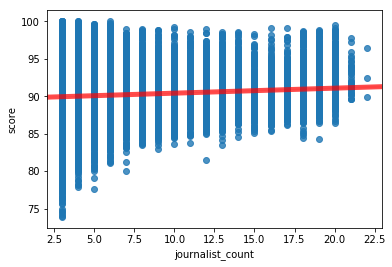

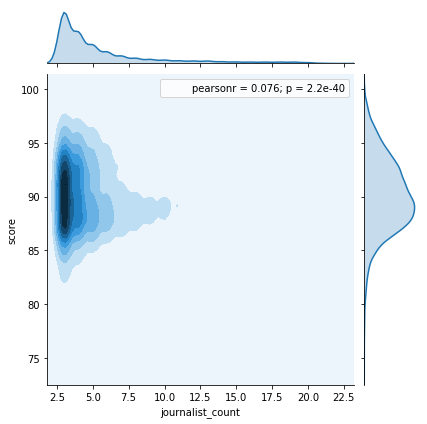

In [15]:
sns.regplot(x=df["journalist_count"], y=df["score"], line_kws={"color":"r","alpha":0.7,"lw":5})

# sns.jointplot(x=df["journalist_count"], y=df["score"], kind='scatter')

sns.jointplot(x=df["journalist_count"], y=df["score"], kind='kde')

## What is the optimal age of a wine to drink?

In [16]:
import datetime

In [21]:
df['year'] = pd.to_numeric(df['date'].str[:4])
df['age'] = df['year'] - df['vintage']
df.head()

,appellation,appellation_slug,classification,color,confidence_index,country,date,is_primeurs,journalist_count,lwin,lwin_11,regions,score,vintage,wine,wine_id,wine_slug,wine_type,year,age
index,,,,,,,,,,,,,,,,,,,,
0,Chianti Classico Gran Selezione,chianti-classico-gran-selezione,NaN,Red,A+,Italy,2019-06-15,False,5,NaN,NaN,['Tuscany'],93.59,2015,"Marchesi Antinori, Badia a Passignano, Chianti...",147377,marchesi-antinori-badia-a-passignano-chianti-c...,NaN,2019,4
1,Chateauneuf Du Pape,chateauneuf-du-pape,NaN,Red,B+,France,2019-06-15,False,5,1113130.0,1.113130e+10,['Rhone'],90.68,2015,"E. Guigal, Chateauneuf Du Pape",68461,e-guigal-chateauneuf-du-pape,NaN,2019,4
2,Saint Emilion Grand Cru,saint-emilion-grand-cru,NaN,Red,B+,France,2019-06-15,False,9,NaN,NaN,['Bordeaux'],89.85,2016,"Chateau Montlabert, Saint Emilion Grand Cru",39471,chateau-montlabert-saint-emilion-grand-cru,NaN,2019,3
3,Haut Medoc,haut-medoc,Cru Bourgeois,Red,B,France,2019-06-15,False,7,NaN,NaN,['Bordeaux'],89.09,2016,"Chateau Larose Trintaudon, Haut Medoc",38120,chateau-larose-trintaudon-haut-medoc,NaN,2019,3
4,Puisseguin Saint Emilion,puisseguin-saint-emilion,NaN,Red,C+,France,2019-06-15,False,3,NaN,NaN,['Bordeaux'],88.52,2016,"Vignobles Lannoye, Chateau Lanbersac, Puissegu...",140096,vignobles-lannoye-chateau-lanbersac-puisseguin...,NaN,2019,3


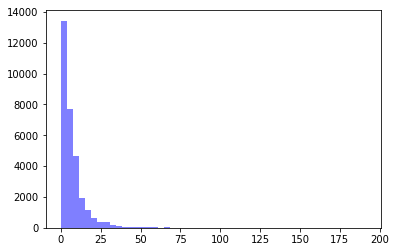

In [23]:
num_bins = 50
n, bins, patches = plt.hist(df['age'], num_bins, facecolor='blue', alpha=0.5)
plt.show()